<a href="https://colab.research.google.com/github/LaZBean/DRL_Escaper/blob/main/DRL_Escaper.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install tensorflow-gpu==2.3.0
!pip install gym
!pip install keras
!pip install keras-rl2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached tensorflow_estimator-2.3.0-py2.py3-none-any.whl (459 kB)
  Using cached numpy-1.18.5-cp37-cp37m-manylinux1_x86_64.whl (20.1 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.6
    Uninstalling numpy-1.21.6:
      Successfully uninstalled numpy-1.21.6
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.9.0
    Uninstalling tensorflow-estimator-2.9.0:
      Successfully uninstalled tensorflow-estimator-2.9.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
xarray-einstats 0.2.2 requires numpy>=1.21, but you have numpy 1.18.5 which is incompatible.
tensorflow 2.9.2 requires numpy>=1.20, but you have numpy 1.18.5 which is incompatible.
tensorflow 2.9.2 requires tensorflow-estima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached numpy-1.21.6-cp37-cp37m-manylinux_2_12_x86_64.manylinux2010_x86_64.whl (15.7 MB)
  Using cached tensorflow_estimator-2.9.0-py2.py3-none-any.whl (438 kB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.18.5
    Uninstalling numpy-1.18.5:
      Successfully uninstalled numpy-1.18.5
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.3.0
    Uninstalling tensorflow-estimator-2.3.0:
      Successfully uninstalled tensorflow-estimator-2.3.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
t

In [ ]:
from gym import Env
from gym.spaces import Discrete, Box
import numpy as np
import random
import time

from IPython.display import clear_output

In [ ]:
class CustomEnv(Env):
  def __init__(self):
    
    self.action_space = Discrete(4)
    self.observation_space = 7

    self.w = 10
    self.h = 10
    self.max_time = 100
    self.state_size = 7

    self.reset()

  def step(self, action):

    self.time+=1

    xd = (self.playerX - self.enemyX)
    yd = (self.playerY - self.enemyY)
    self.d = abs(xd) + abs(yd)
        
    if(self.time%2==0):
      if( abs(xd)>abs(yd) ):
        self.enemyX += 1 * np.sign(xd)
      else:
        self.enemyY += 1 * np.sign(yd)


    if(self.done == False):
      if(action == 0):
        self.playerY +=1
      elif(action == 1):
        self.playerX +=1
      elif(action == 2):
        self.playerY -=1
      elif(action == 3):
        self.playerX -=1
        
    reward = 0
    info = ""
    if(self.is_lost()):
      reward = -100
      self.done = True
      info = "Catch!"
    elif(self.player_is_out_of_bounds()):
      reward = -100
      self.done = True
      info = "Out!"
    elif(self.time >= self.max_time):
      reward = 1
      self.done = True
      info = "Survived!"
    else:
      reward = 1

    return self.state_creator(), reward, self.done, {}


  def render(self, mode='human', close=False):
    clear_output()
    boxGreen = '\033[;42m \033[0m'
    boxRed = '\033[;41m \033[0m'

    for x in range(self.w):
      print("[", end = ' ')
      
      for y in range(self.h):
        s = " ,"
        if(self.playerX == x and self.playerY == y):
          s = boxGreen+","
        if(self.enemyX == x and self.enemyY == y):
          s = boxRed+","
        
        print(s, end = ' ')
        
      print("]")  
    print("step: {}, dist: {}, pos: [{}, {}]".format(self.time, self.d, self.playerX, self.playerY))  
    time.sleep(1)


  def reset(self):
    self.d = 0
    self.time = 0
    self.done = False

    self.tiles = [[0 for i in range(self.w)] for j in range(self.h)] 

    self.playerX = random.randint(0, self.w-1)
    self.playerY = random.randint(0, self.h-1)

    self.enemyX = random.randint(0, self.w-1)
    self.enemyY = random.randint(0, self.h-1)

    return self.state_creator()

  def is_lost(self):
    return ((self.playerX == self.enemyX) and (self.playerY == self.enemyY))

  def player_is_out_of_bounds(self):
    return (self.playerX < 0) or (self.playerY < 0) or (self.playerX >= self.w) or (self.playerY >= self.h)

  def state_creator(self):
    
    state = []
    state.append(self.w)
    state.append(self.h)
    state.append(self.playerX)
    state.append(self.playerY)
    state.append(self.enemyX)
    state.append(self.enemyY)
    state.append(self.d)
    

    r = np.array([state])
    r = np.reshape(r, [1, self.observation_space])
    return r

In [ ]:
env = CustomEnv()

In [ ]:
env.state_creator()

array([[10, 10,  4,  5,  7,  2,  0]])

In [ ]:

episodes = 10
for episode in range(1, episodes+1):
    state = env.reset()
    #print(state)
    done = False
    score = 0 
    
    while not done:
        #env.render()
        action = env.action_space.sample()
        n_state, reward, done, info = env.step(action)
        score+=reward
    print('Episode:{} Score:{}'.format(episode, score))

Episode:1 Score:-85
Episode:2 Score:-100
Episode:3 Score:-94
Episode:4 Score:-97
Episode:5 Score:-82
Episode:6 Score:-90
Episode:7 Score:-90
Episode:8 Score:-83
Episode:9 Score:-100
Episode:10 Score:-86


# **2. Create a Deep Learning Model with Keras**

In [ ]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam


In [ ]:
states = env.observation_space#env.observation_space.shape[0]
actions = env.action_space.n

In [ ]:
def build_model(states, actions):
    model = Sequential()    
    model.add(Dense(24, activation='relu', input_shape=(1,1,7,))) # input_dim=states
    model.add(Dense(24, activation='relu'))
    model.add(Flatten())
    model.add(Dense(actions, activation='linear'))
    return model

In [ ]:

model = build_model(states, actions)
model.summary()

Model: "sequential_24"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_62 (Dense)             (None, 1, 1, 24)          192       
_________________________________________________________________
dense_63 (Dense)             (None, 1, 1, 24)          600       
_________________________________________________________________
flatten_13 (Flatten)         (None, 24)                0         
_________________________________________________________________
dense_64 (Dense)             (None, 4)                 100       
Total params: 892
Trainable params: 892
Non-trainable params: 0
_________________________________________________________________


In [ ]:
del model

# **3. Build Agent with Keras-RL**

In [ ]:
from rl.agents import DQNAgent
from rl.policy import BoltzmannQPolicy
from rl.memory import SequentialMemory

In [ ]:
def build_agent(model, actions):
    policy = BoltzmannQPolicy()
    memory = SequentialMemory(limit=50000, window_length=1)
    dqn = DQNAgent(model=model, memory=memory, policy=policy, 
                  nb_actions=actions, nb_steps_warmup=10, target_model_update=1e-2)
    return dqn

In [ ]:
dqn = build_agent(model, actions)
dqn.compile(Adam(lr=1e-3), metrics=['mae'])
history = dqn.fit(env, nb_steps=50000, visualize=False, verbose=1)

Training for 50000 steps ...
Interval 1 (0 steps performed)
    1/10000 [..............................] - ETA: 1:19:58 - reward: 1.0000

/usr/local/lib/python3.7/dist-packages/rl/memory.py:37: UserWarning: Not enough entries to sample without replacement. Consider increasing your warm-up phase to avoid oversampling!
  warnings.warn('Not enough entries to sample without replacement. Consider increasing your warm-up phase to avoid oversampling!')


10000/10000 [==============================] - 96s 10ms/step - reward: -2.1411
339 episodes - episode_reward: -63.416 [-100.000, 100.000] - loss: 86.434 - mae: 39.032 - mean_q: -41.902

Interval 2 (10000 steps performed)
10000/10000 [==============================] - 92s 9ms/step - reward: 0.7879
119 episodes - episode_reward: 66.387 [-100.000, 100.000] - loss: 78.022 - mae: 16.871 - mean_q: 1.011

Interval 3 (20000 steps performed)
10000/10000 [==============================] - 94s 9ms/step - reward: 0.9091
107 episodes - episode_reward: 84.981 [-100.000, 100.000] - loss: 100.210 - mae: 20.343 - mean_q: 40.840

Interval 4 (30000 steps performed)
10000/10000 [==============================] - 96s 10ms/step - reward: 0.9192
107 episodes - episode_reward: 86.299 [-100.000, 100.000] - loss: 100.497 - mae: 30.724 - mean_q: 58.792

Interval 5 (40000 steps performed)
10000/10000 [==============================] - 96s 10ms/step - reward: 0.8788
done, took 473.791 seconds


In [ ]:
scores = dqn.test(env, nb_episodes=100, visualize=False)
print(np.mean(scores.history['episode_reward']))

Testing for 100 episodes ...
Episode 1: reward: 100.000, steps: 100
Episode 2: reward: 100.000, steps: 100
Episode 3: reward: 100.000, steps: 100
Episode 4: reward: 100.000, steps: 100
Episode 5: reward: 100.000, steps: 100
Episode 6: reward: 100.000, steps: 100
Episode 7: reward: 100.000, steps: 100
Episode 8: reward: 100.000, steps: 100
Episode 9: reward: 100.000, steps: 100
Episode 10: reward: 100.000, steps: 100
Episode 11: reward: 100.000, steps: 100
Episode 12: reward: 100.000, steps: 100
Episode 13: reward: 100.000, steps: 100
Episode 14: reward: 100.000, steps: 100
Episode 15: reward: -100.000, steps: 1
Episode 16: reward: 100.000, steps: 100
Episode 17: reward: 100.000, steps: 100
Episode 18: reward: 100.000, steps: 100
Episode 19: reward: 100.000, steps: 100
Episode 20: reward: 100.000, steps: 100
Episode 21: reward: 100.000, steps: 100
Episode 22: reward: 100.000, steps: 100
Episode 23: reward: 100.000, steps: 100
Episode 24: reward: 100.000, steps: 100
Episode 25: reward: 1

In [ ]:
_ = dqn.test(env, nb_episodes=1, visualize=True)

[  ,  ,  ,  ,  ,  ,  ,  ,  ,  , ]
[  ,  ,  ,  ,  ,  ,  ,  ,  ,  , ]
[  ,  ,  ,  ,  ,  ,  ,  ,  ,  , ]
[  ,  ,  ,  ,  ,  ,  ,  ,  ,  , ]
[  ,  ,  ,  ,  ,  ,  ,  ,  ,  , ]
[  ,  ,  ,  ,  ,  ,  ,  ,  ,  , ]
[  ,  ,  ,  ,  ,  ,  ,  ,  ,  , ]
[  ,  ,  ,  ,  ,  ,  ,  ,  ,  , ]
[  ,  ,  ,  ,  ,  ,  ,  ,  ,  , ]
[  ,  ,  ,  ,  ,  ,  ,  ,  ,  , ]
Episode 1: reward: 100.000, steps: 100


# **4. Reloading Agent from Memory**

In [ ]:
dqn.save_weights('dqn_weights.h5f', overwrite=True)

In [ ]:
env = CustomEnv()
actions = env.action_space.n
states = env.observation_space
model = build_model(states, actions)
dqn = build_agent(model, actions)
dqn.compile(Adam(lr=1e-3), metrics=['mae'])

In [ ]:
dqn.load_weights('dqn_weights.h5f')

In [ ]:
_ = dqn.test(env, nb_episodes=1, visualize=True)

In [ ]:
scores = dqn.test(env, nb_episodes=25, visualize=False)
print(np.mean(scores.history['episode_reward']))

Testing for 25 episodes ...
Episode 1: reward: -100.000, steps: 1
Episode 2: reward: 100.000, steps: 100
Episode 3: reward: 100.000, steps: 100
Episode 4: reward: 100.000, steps: 100
Episode 5: reward: 100.000, steps: 100
Episode 6: reward: 100.000, steps: 100
Episode 7: reward: 100.000, steps: 100
Episode 8: reward: 100.000, steps: 100
Episode 9: reward: 100.000, steps: 100
Episode 10: reward: 100.000, steps: 100
Episode 11: reward: 100.000, steps: 100
Episode 12: reward: 100.000, steps: 100
Episode 13: reward: 100.000, steps: 100
Episode 14: reward: 100.000, steps: 100
Episode 15: reward: 100.000, steps: 100
Episode 16: reward: 100.000, steps: 100
Episode 17: reward: 100.000, steps: 100
Episode 18: reward: 100.000, steps: 100
Episode 19: reward: 100.000, steps: 100
Episode 20: reward: 100.000, steps: 100
Episode 21: reward: 100.000, steps: 100
Episode 22: reward: 100.000, steps: 100
Episode 23: reward: 100.000, steps: 100
Episode 24: reward: 100.000, steps: 100
Episode 25: reward: 10

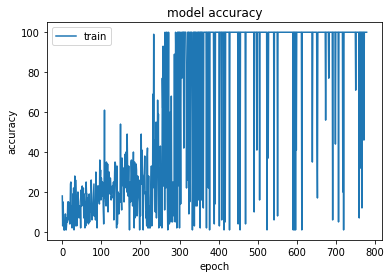

In [ ]:
import plotly.graph_objs as go
from matplotlib import pyplot as plt

plt.plot(history.history['nb_episode_steps'])
#plt.plot(history.history['episode_reward'])
#nb_steps
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

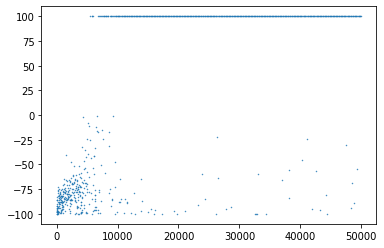

In [ ]:
X = np.array(history.history['nb_steps'])
Y = np.array(history.history['episode_reward'])

plt.scatter(X,Y, s=0.2)
plt.show()